In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
test_dir='C:/Users/apurv/Downloads/test'
train_dir='C:/Users/apurv/Downloads/train'
validation_dir='C:/Users/apurv/Downloads/validation'

In [4]:
# Data Pre-processing
from keras_preprocessing.image import ImageDataGenerator

In [5]:
train_datagen= ImageDataGenerator(rescale=1./255)    # train_datagen is an object that will rescale later on.
test_datagen= ImageDataGenerator(rescale=1./255)     # test_datagen is an object that will rescale later on.
# ImageDataGenerator can be used to rescale , zoom, shear etc ;images which are given as input.

train_generator= train_datagen. flow_from_directory(
                      train_dir,                    # images will be taken from 'train directory'
                      target_size=(150,150),         # after resizing, size will be 150px x 150px
                      batch_size= 20,                #picking 20 images at a time.
                      class_mode='binary'           # As it is a binary classification(cat or dog), so, it will generate a 'y' variable showing 'cat' or 'dog'.
)

validation_generator= test_datagen. flow_from_directory(
                         validation_dir,
                         target_size=(150,150),
                         batch_size=20,
                         class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
# creating CNN
model=models.Sequential()
# adding 4 convolutionary layers
# more convolutionary layer, more feature maps, more overlapping, lesser errors 
# A general practise: Convolutionary layer width (i.e. number of filters) must increase (or double) with each 
# next convolutionary layer and as we are using maxpooling layer,
#  which does not overlapp and reduced the size , so, our picture size must decrease with each convolutionary layer.
# So, layer width must increase and picture size must decrease.
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))  # as it coloured image, so, we require  
                                                                                                     # 3 R,G,B colour filters.
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
# Followed by ANN 
model.add(layers.Flatten())
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
from tensorflow.keras import optimizers
model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(lr=1e-4),
              #RMSprop is often used in image processing and is better than stochastic gradient descent in context of 
              #                                                                                                image processing.
              metrics=['acc'])

C:\Users\apurv\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
history=model.fit(
              train_generator,
              steps_per_epoch=100,
              epochs=20,
              validation_data=validation_generator,
              validation_steps=50
)

Epoch 1/20
100/100 [==============================] - 72s 711ms/step - loss: 0.6886 - acc: 0.5390 - val_loss: 0.6797 - val_acc: 0.5290
Epoch 2/20
100/100 [==============================] - 69s 685ms/step - loss: 0.6567 - acc: 0.6225 - val_loss: 0.6472 - val_acc: 0.6150
Epoch 3/20
100/100 [==============================] - 69s 694ms/step - loss: 0.6124 - acc: 0.6620 - val_loss: 0.6149 - val_acc: 0.6530
Epoch 4/20
100/100 [==============================] - 67s 668ms/step - loss: 0.5635 - acc: 0.7095 - val_loss: 0.5949 - val_acc: 0.6820
Epoch 5/20
100/100 [==============================] - 69s 691ms/step - loss: 0.5261 - acc: 0.7250 - val_loss: 0.6322 - val_acc: 0.6550
Epoch 6/20
100/100 [==============================] - 69s 687ms/step - loss: 0.5113 - acc: 0.7510 - val_loss: 0.5735 - val_acc: 0.6850
Epoch 7/20
100/100 [==============================] - 72s 720ms/step - loss: 0.4804 - acc: 0.7745 - val_loss: 0.5583 - val_acc: 0.7090
Epoch 8/20
100/100 [==============================] - 6

In [11]:
# we have used directories, in this project, because the input which which we have been given are in form of Folders and not
#  individual files and images, hence, they are so-called as' directory' of images.
# we have batch_size=20 means at a time 20 images will be taken from the directory and will be rescaled.
# since, batch_size=20 so,
#  as epoch is 20 so, steps_per-epoch= total number of images in folder / batch_size
#                                    =   2000/ 20 =1000
#  given, train has 2000 images
# validation has 1000 images,so,
# validation_steps= t(n(images in validation folder)) / batch_size
#                 =   1000 / 20
#                 =   50
# Test data also has 1000 images for testing.

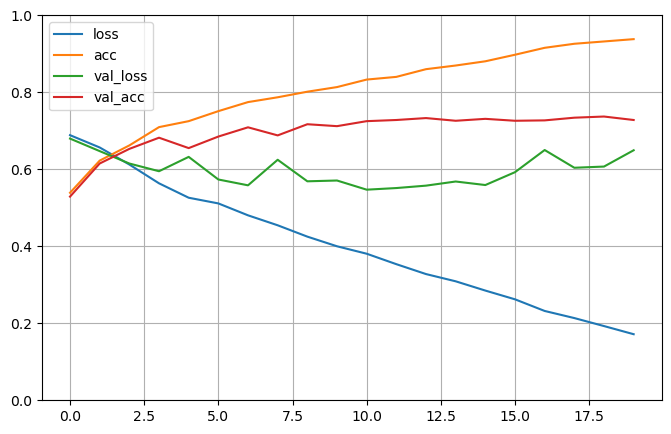

In [12]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [13]:
test_generator= test_datagen. flow_from_directory(
                         validation_dir,
                         target_size=(150,150),
                         batch_size=20,
                         class_mode='binary'
)

model.evaluate(test_generator,steps=50)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 9s 187ms/step - loss: 0.6494 - acc: 0.7280


[0.6494104862213135, 0.7279999852180481]

In [14]:
# Test data has 1000 images for testing, we have entered them in steps of 50.

In [15]:
# low training error and high testing/validation error = overfitting
# high training error and high test/validation error= underfitting

In [16]:
# in our model, we can see training error is nearly 20% but validation error is nearly 60% ,so, training error is low and 
# validation  error is high , hence, it is clearly 'over-fiting'.

In [17]:
model.save("model.h5")  # h5 is HDF i.e. High Data Hierarchy file which is used to store files having large amount of data.
# As we have stored this model, so, even if we delete this model , we can easily retrieve it for fututre works.

In [18]:
from tensorflow.keras import backend as K
K.clear_session()   # clears history
del model    # deletes model to create a new model

# Data Augmentation: To avoid OVER-FITTING: Use of Dropout Layer

In [19]:
# We can do a large number of operations on images:
# 1. Shearing / Shear: Converting a square image as if it is being pulled ,so, as to convert it to rhombus.
# 2. Rotation: rotataing the image
# 3. Width_shift: Shifting the image along width.
# 4. Height_shift: Shifting the image along height.

# Through the use of 'Data Augmentation' , we will create 'dummy data'.

In [20]:
# Pre-processing:
from keras_preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(  #'train_datagen' is an object which will do properties which are in its parenthesis.
       rescale= 1./255,             # rescaling pixels in between 0 and 1.
       rotation_range=40,           # rotation will be done by any random angle between -40 to +40 degrees.
       width_shift_range=0.2,       # img will be shifted by any random length from 0 to 20% of its width along the width.
       height_shift_range=0.2,      # img will be shifted by any random length from 0 to 20% of its height along the height.
       shear_range=0.2,             # shearing will slant the image.
                                    # shear range of 0.2 means image will be slanted by random value from 0 to 0.2 degrees.
       zoom_range=0.2,               # zoom in or zoom out by any random value from 0 to 20 %.
       horizontal_flip= True)       # Create mirror image about any vertical axis of image.

test_datagen= ImageDataGenerator(rescale=1./255)

train_generator= train_datagen.flow_from_directory(
            train_dir,               # this is the directory from which images will flow out.
            target_size=(150,150),
            batch_size=32,
            class_mode='binary'
            )
# NOTE:As only training data is 'over-fitting' ,so, we apply 'train_datagen' only on 'train_dir'.
validation_generator=test_datagen.flow_from_directory(
             validation_dir,      # this is the directory from which images will flow out.
             target_size=(150,150),
             batch_size=32,
             class_mode='binary'
              )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
# Creating Architecture:
# creating CNN
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3))) 
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

# Followed by ANN 
model.add(layers.Flatten())

model.add(layers.Dropout(0.5))   ###
# 'Dropout' is a very effective layer to avoid over-fitting. Here, 0.5 means the dropout layer will randomly select 50% neurons
#   for further considerations and will deactivate the remaining 50% ,hence, avoiding 'over-fitting'.

model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [22]:
# compiling:
from tensorflow.keras import optimizers
model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [23]:
history=model.fit(
              train_generator,
              steps_per_epoch=25,
    # taking more images here, as many dummy images will also be generated here.
              epochs=25,
              validation_data=validation_generator,
              validation_steps=25
)

Epoch 1/25
25/25 [==============================] - 40s 2s/step - loss: 0.6973 - acc: 0.5050 - val_loss: 0.6906 - val_acc: 0.5650
Epoch 2/25
25/25 [==============================] - 31s 1s/step - loss: 0.6952 - acc: 0.4700 - val_loss: 0.6872 - val_acc: 0.5188
Epoch 3/25
25/25 [==============================] - 28s 1s/step - loss: 0.6935 - acc: 0.4950 - val_loss: 0.6877 - val_acc: 0.5150
Epoch 4/25
25/25 [==============================] - 26s 1s/step - loss: 0.6882 - acc: 0.5255 - val_loss: 0.6892 - val_acc: 0.5200
Epoch 5/25
25/25 [==============================] - 26s 1s/step - loss: 0.6896 - acc: 0.5421 - val_loss: 0.6826 - val_acc: 0.5850
Epoch 6/25
25/25 [==============================] - 28s 1s/step - loss: 0.6839 - acc: 0.5574 - val_loss: 0.6702 - val_acc: 0.6037
Epoch 7/25
25/25 [==============================] - 31s 1s/step - loss: 0.6759 - acc: 0.5804 - val_loss: 0.6966 - val_acc: 0.5188
Epoch 8/25
25/25 [==============================] - 29s 1s/step - loss: 0.6754 - acc: 0.58

In [24]:
model.save("project_cnn.h5")
test_generator= test_datagen. flow_from_directory(
                         validation_dir,
                         target_size=(150,150),
                         batch_size=20,
                         class_mode='binary'
)

model.evaluate(test_generator,steps=50)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 9s 172ms/step - loss: 0.5963 - acc: 0.6840


[0.5962955951690674, 0.6840000152587891]

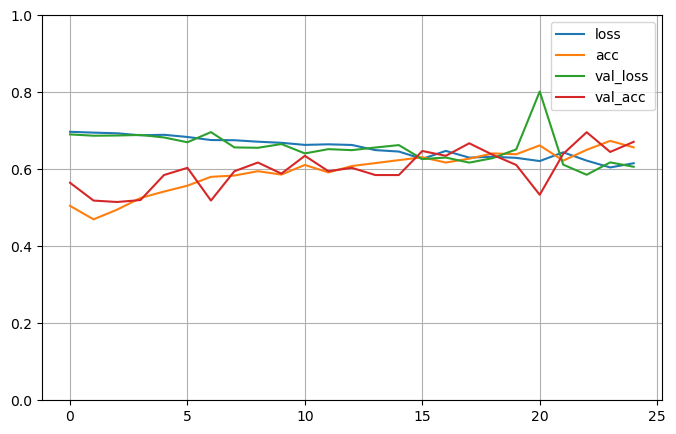

In [25]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [26]:
# as training accuracy and validation accuracy are now near-by so, we have successfully overcome 'Over-fitting' through 'image
#  preprocessing' and creating 'dummy images'.

# Transfer Learning: To increase the accuracy

In [27]:
# Every CNN model has 2 parts: 1.Convolution base 2.Fully Connected Neural Network
# The 'convolution base' in our project performs the task of identifying the facial properties of cats and dogs like 'eyes',
# 'whiskers' etc and the convolution base which we have created here, will work for many other similar classification problems.
# So, we can conclude that 'convolution base' will perform similar tasks with similar accuracy in many other classification
# problems.
# But Fully connected neural network, will work only in specific classification problems like in our project, it uses 'eyes',
# 'whiskers' etc from 'convolution base' to classify it as 'cats' or 'dogs'.

In [28]:
# NOTE:
# The accuracy which we have achieved bove are subject to user's PC or desktop system configurations, in case of better system
# confuguration , better accuracy would have been achieved above. Its subject to user's PC's or desktop's  RAM, graphic car,
 # GPU etc configuration.

In [29]:
# As a convolution base will work in many similar classification scenarios, so, we can import many award winning bases in our
# model to increase our accuracy. This method of importing award winning convolution bases using keras or other sources to 
# increase ones model's accuracy is called as 'Transfer Learning'.

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(
              rescale= 1./255,
              rotation_range=40,
              width_shift_range=0.2,
              height_shift_range=0.2,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True
)

test_datagen= ImageDataGenerator(rescale= 1./255)

train_generator= train_datagen.flow_from_directory(
      train_dir,
      target_size=(150,150),
      batch_size=20,
      class_mode='binary'
)
validation_generator=test_datagen.flow_from_directory(
      validation_dir,
      target_size=(150,150),
      batch_size=20,
      class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Using VGG16 Convolution Base:

In [31]:
#importing convolution base architecture from VGG16:
from tensorflow.keras.applications import VGG16

conv_base= VGG16(weights='imagenet', 
# as we generally provide random weights and it gets accurate inside the model but here as we are importing the convolution base
# we need that particularly most accurate weights for much higher accuracy, those particular values of weights are  called
# as 'imagenet' as this model was winner of ILSVRC i.e. Imagenet Large Scale Visual Recognition Challenge.                 
                 include_top=False, 
# We only need convolution base and not fully connected neural network part so, we do not include 'top'.                 
                 input_shape=(150,150,3))
# 3 for filters as it is a colorful image.

In [32]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [33]:
# As seen from summary, this VGG16 model has 'convolution blocks'. A convolution block consists of many convolution layers.
# like first and second convolution blocks have 2 convolution layers.
# And third, fourth and fifth blocks have 3 convolution layers each.

In [34]:
# Creating model:
# Earlier we have only imported VGG architecture and stored it in 'conv_base'.
from tensorflow.keras import models
from tensorflow.keras import layers

model= models.Sequential()
model.add(conv_base) # added VGG16 convolutionary base
# Adding Fully connected neural network:
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [36]:
# so, VGG16 has approximately 14 million trainable parameters ,these are kept trainable so, that our accuracy is more. But these
# increase runtime of the program, in order to optimize time one can set these parameters to non-trainable. So, at the VGG16
# Param# columns we will see 0 and hence , Total params will be only 2097408+ 257 =approx 2 million ,so, our runtime will be 
# reduced significantly.

# In order to make VGG16 parameters as non-trainable set:
# conv_base.trainable=False

In [37]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

In [38]:
checkpoint_cb= keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [39]:
history= model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50,
        callbacks=[checkpoint_cb])

Epoch 1/30


C:\Users\apurv\AppData\Local\Temp\ipykernel_11936\2540134950.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= model.fit_generator(


100/100 [==============================] - 976s 10s/step - loss: 0.4712 - acc: 0.7740 - val_loss: 0.2024 - val_acc: 0.9140
Epoch 2/30
100/100 [==============================] - 997s 10s/step - loss: 0.2759 - acc: 0.8890 - val_loss: 0.2527 - val_acc: 0.8910
Epoch 3/30
100/100 [==============================] - 1114s 11s/step - loss: 0.2125 - acc: 0.9185 - val_loss: 0.1060 - val_acc: 0.9600
Epoch 4/30
100/100 [==============================] - 1201s 12s/step - loss: 0.1788 - acc: 0.9265 - val_loss: 0.1034 - val_acc: 0.9670
Epoch 5/30
100/100 [==============================] - 1108s 11s/step - loss: 0.1538 - acc: 0.9410 - val_loss: 0.2418 - val_acc: 0.9030
Epoch 6/30
100/100 [==============================] - 988s 10s/step - loss: 0.1419 - acc: 0.9505 - val_loss: 0.0795 - val_acc: 0.9700
Epoch 7/30
100/100 [==============================] - 1037s 10s/step - loss: 0.1208 - acc: 0.9505 - val_loss: 0.1881 - val_acc: 0.9370
Epoch 8/30
100/100 [==============================] - 917s 9s/step - 

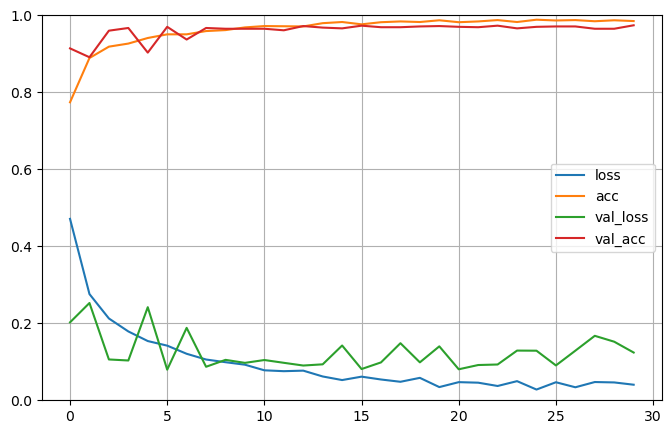

In [43]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [44]:
# As validation accuracy and training accuracy is approximately convergent so, we have achieved convergence and there is no
# overfitting here.

In [46]:
# Now, checking our model on testing data

In [47]:
test_generator= test_datagen.flow_from_directory(
              test_dir,
              target_size=(150,150),
              batch_size=20,
              class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [48]:
model.evaluate_generator(test_generator,steps=50) 
# Total images in testing set =1000= 50 x 20 = steps x batch_size

C:\Users\apurv\AppData\Local\Temp\ipykernel_11936\2075860562.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator,steps=50)


[0.13785682618618011, 0.972000002861023]

In [49]:
# Using Transfer learning technique i.e. using VGG16 model we have achieved an astonishing accuracy of 97.2%.

# Accuracy achieved = 97.2%